# Общие сведения
Данные были разделены на две группы:

тренировочный набор (train.csv)
тестовый набор (test.csv)
Обучающий набор следует использовать для построения моделей машинного обучения. Для тренировочного набора мы предоставляем результат (также известный как” наземная правда") для каждого пассажира. Ваша модель будет основана на “особенностях”, таких как пол и класс пассажиров. Вы также можете использовать инженерная характеристика для создания новых функций.

Тестовый набор следует использовать для того, чтобы увидеть, насколько хорошо ваша модель работает с невидимыми данными. Для тестового набора мы не предоставляем основную истину для каждого пассажира. Это ваша работа, чтобы предсказать эти результаты. Для каждого пассажира в тестовом наборе используйте модель, которую вы обучили, чтобы предсказать, выживут ли они после потопления "Титаника".


# Описание переменных
* survival - Выжил ли пассажир (0 – нет, 1 – да)
* pclass - Класс (1 – первый, 2 – второй, 3 – третий)
* name - Имя
* sex - Пол
* age - Возраст
* sibsp - Количество братьев, сестер, супругов на борту
* parch - Количество родителей, детей на борту
* ticket - Номер билета
* fare - Стоимость билета
* cabin - Каюта
* embarked - Место посадки (C – Шербур, Q – Куинстаун, S – Саутгемптон)

# Импортируем все необходимые библиотеки.

In [3]:
import sys

In [3]:
pip install pandas-profiling

  Using cached https://files.pythonhosted.org/packages/32/79/5d03ed1172e3e67a997a6a795bcdd2ab58f84851969d01a91455383795b6/pandas_profiling-2.9.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/bc/45/5118a05b0d61173e6eb12bc5804f0fbb6f196adb0a20e0b16efc2b8e98be/seaborn-0.11.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/26/e3/9416e94e767d59a86edcbcb8e1c8f42874d272c3b343676074879e9db0e0/visions-0.5.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/2b/de/6e4dd6d720c49939544352155dc06a08c9f7e4271aa631a559dfbeaaf9d4/missingno-0.4.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/01/5a/7ef1c04ce62cd72f900c06298dc2385840550d5c653a0dbc19109a5477e6/phik-0.10.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/6d/55/b4726d81e5d6509fa3441f770f8a9524612627dc1b2a7d6209d1d20083fe/confuse-1.4.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/9b/cd/dc5

ERROR: phik 0.10.0 has requirement joblib>=0.14.1, but you'll have joblib 0.13.2 which is incompatible.


In [5]:
pip install plotly --upgrade

  Stored in directory: C:\Users\12C2~1\AppData\Local\pip\Cache\wheels\d7\a9\33\acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [239]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import plotly.express as px
import plotly.graph_objects as go
import sklearn.metrics as metrics

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, roc_curve,auc, confusion_matrix, classification_report
from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression

In [167]:
def RMSE(target, predict):
    RMSE = mean_squared_error(target, predict) ** 0.5
    return RMSE

score = make_scorer(RMSE, greater_is_better=False)

In [168]:
cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=12345)

In [169]:
custom_colors = ["#c8e7ff","#deaaff", "#f72585","#d100d1"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))

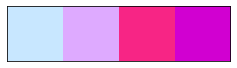

In [170]:
sns.palplot(sns.color_palette(custom_colors),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)

In [171]:
train_data = pd.read_csv(r'C:\Users\Артём\OneDrive\Рабочий стол\data bases\kaggle\Titanic\train.csv')

In [172]:
train_data.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

In [173]:
test_data = pd.read_csv(r'C:\Users\Артём\OneDrive\Рабочий стол\data bases\kaggle\Titanic\test.csv')

In [174]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [175]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [176]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [177]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [178]:
train_data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [179]:
test_data.describe()

PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200

In [180]:
train_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [181]:
test_data.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

Функция pandas df.describe() великолепна, но немного базова для серьезного исследовательского анализа данных. pandas_profiling расширяет фрейм данных pandas с помощью df.profile_report() для быстрого анализа данных.

In [182]:
profile = pandas_profiling.ProfileReport(train_data)
profile

In [183]:
train_data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [184]:
train_data['Cabin'] = train_data['Cabin'].apply(lambda i: i[0] if pd.notnull(i) else 'Z')
test_data['Cabin'] = test_data['Cabin'].apply(lambda i: i[0] if pd.notnull(i) else 'Z')

#### Z указывает на те значения, которые отсутствуют

In [185]:
train_data['Cabin'].unique()

array(['Z', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [186]:
train_data[train_data['Cabin'] == 'T'].index.values

array([339], dtype=int64)

In [187]:
test_data[test_data['Cabin'] == 'T'].index.values

array([], dtype=int64)

In [188]:
train_data.iloc[339]

PassengerId                             340
Survived                                  0
Pclass                                    1
Name           Blackwell, Mr. Stephen Weart
Sex                                    male
Age                                      45
SibSp                                     0
Parch                                     0
Ticket                               113784
Fare                                   35.5
Cabin                                     T
Embarked                                  S
Name: 339, dtype: object

Нет никаких свидетельств того, что кто-то еще занимал каюту на шлюпочной палубе. Поскольку он был пассажиром класса 1, мы группируем его с пассажирами палубы А.

In [189]:
index = train_data[train_data['Cabin'] == 'T'].index
train_data.loc[index, 'Cabin'] = 'A'

In [190]:
def plot_bar(df, feat_x, feat_y,s, normalize=True):
    ct = pd.crosstab(df[feat_x], df[feat_y])
    return ct.plot(kind='bar', stacked=s)

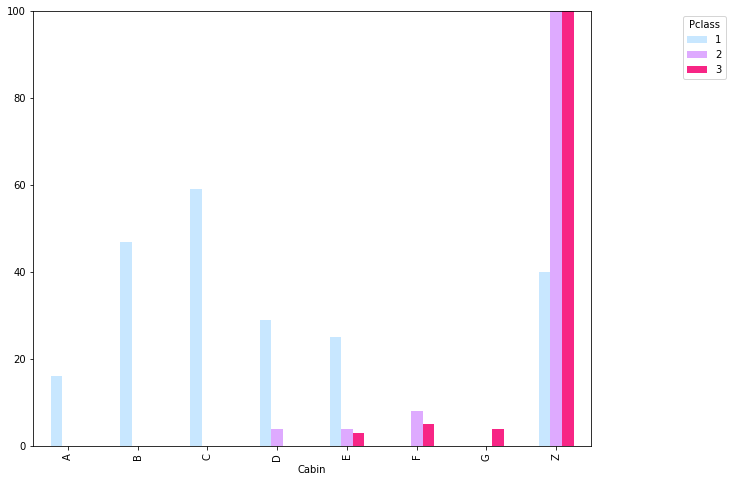

In [191]:
plot_bar(train_data, 'Cabin', 'Pclass',False)
plt.legend(title='Pclass',loc='upper right',bbox_to_anchor=(1.25, 1))
plt.gcf().set_size_inches(10,8)
plt.ylim(0,100)
plt.show()

* А, В и С имеют только пассажиров класса 1.
* D уже как 1 класс и 2 пассажиров. Е имеет класс 1, 2 и 3 пассажиров. Таким образом, эти два могут быть сгруппированы вместе.
* F и G имеют пассажиров класса 2 и 3.

In [192]:
train_data['Cabin'] = train_data['Cabin'].replace(['A', 'B', 'C'], 'ABC')
train_data['Cabin'] = train_data['Cabin'].replace(['D', 'E'], 'DE')
train_data['Cabin'] = train_data['Cabin'].replace(['F', 'G'], 'FG')

test_data['Cabin'] = test_data['Cabin'].replace(['A', 'B', 'C'], 'ABC')
test_data['Cabin'] = test_data['Cabin'].replace(['D', 'E'], 'DE')
test_data['Cabin'] = test_data['Cabin'].replace(['F', 'G'], 'FG')

In [193]:
train_data['Cabin'] = LabelEncoder().fit_transform(train_data['Cabin'])

In [194]:
test_data['Cabin'] = LabelEncoder().fit_transform(test_data['Cabin'])

- Удалим не нужные для анализа столбцы.
- Заполним пропуски в возрасте медианой.
- Заполним пропуски в embarked.

In [195]:
train_data.drop(["Ticket", "Name", "PassengerId"], axis=1, inplace=True)
test_data.drop(["Ticket", "Name", "PassengerId"], axis=1, inplace=True)

In [196]:
train_data['Age'].fillna(train_data['Age'].median(), inplace = True)
test_data['Age'].fillna(train_data['Age']. median(), inplace = True)

In [197]:
test_data["Fare"].fillna(test_data["Fare"].median(skipna=True), inplace=True)

In [198]:
train_data['Embarked'].fillna('S', inplace = True)
train_data['Embarked'].fillna('S', inplace = True)

#### Замена значения объекта значением int

In [199]:
gender = {'male': 0, 'female': 1}
train_data.Sex = [gender[item] for item in train_data.Sex] 
test_data.Sex = [gender[item] for item in test_data.Sex] 

In [200]:
embarked = {'S': 0, 'C': 1, 'Q': 2}
train_data.Embarked = [embarked[item] for item in train_data.Embarked]
test_data.Embarked = [embarked[item] for item in test_data.Embarked]

In [201]:
train_data.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin         int32
Embarked      int64
dtype: object

### Распределение возраста

In [202]:
def triple_plot(x, title,c):
    fig, ax = plt.subplots(3,1,figsize=(15,8),sharex=True)
    sns.distplot(x, ax=ax[0],color=c)
    ax[0].set(xlabel=None)
    ax[0].set_title('Histogram + KDE')
    sns.boxplot(x, ax=ax[1],color=c)
    ax[1].set(xlabel=None)
    ax[1].set_title('Boxplot')
    sns.violinplot(x, ax=ax[2],color=c)
    ax[2].set(xlabel=None)
    ax[2].set_title('Violin plot')
    fig.suptitle(title, fontsize=16)
    plt.tight_layout(pad=3.0)
    plt.show()

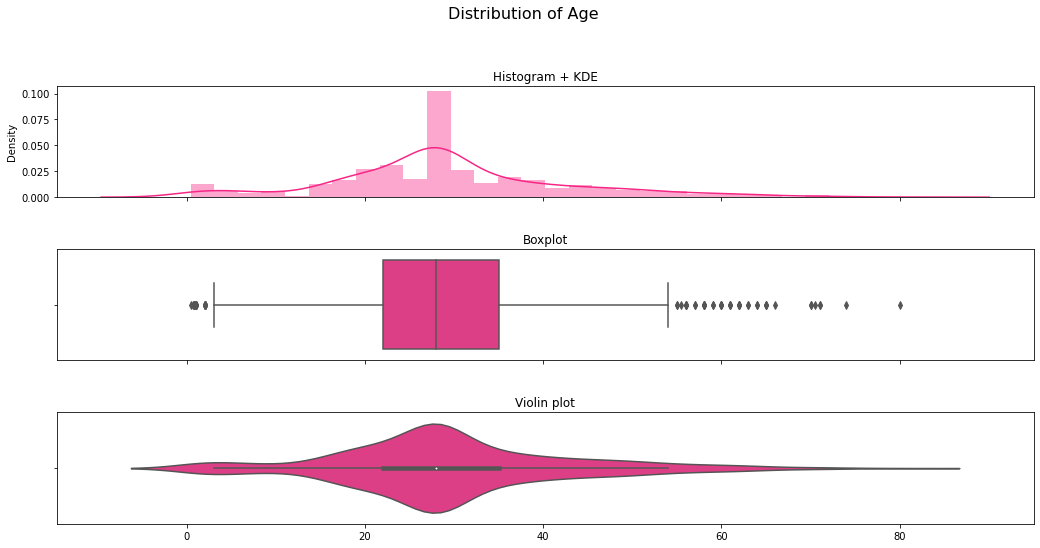

In [203]:
triple_plot(train_data['Age'],'Distribution of Age',custom_colors[2])

### Распределение платы за проезд

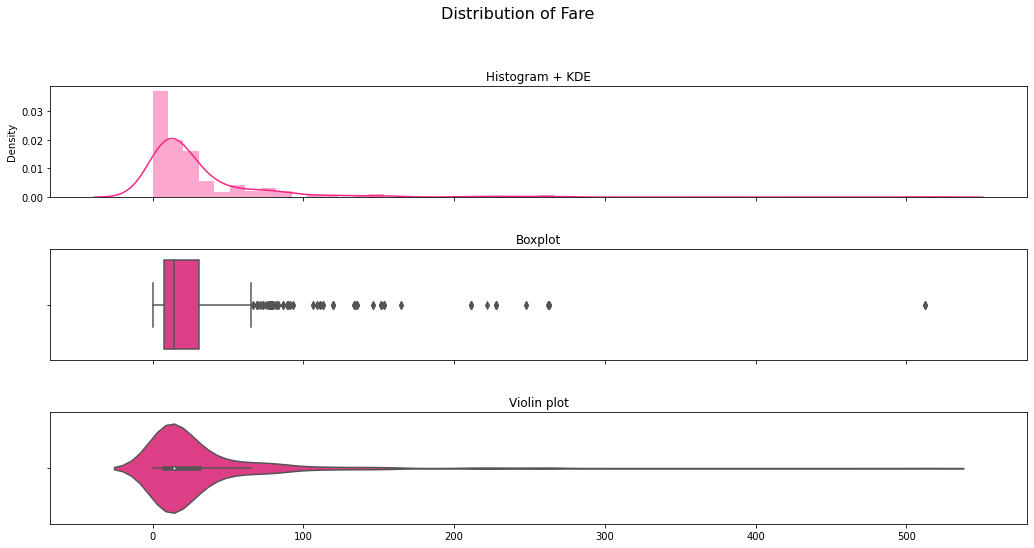

In [204]:
triple_plot(train_data['Fare'],'Distribution of Fare',custom_colors[2])

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

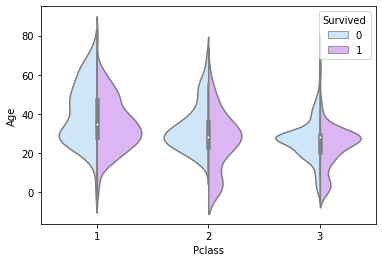

In [205]:
sns.violinplot(x ='Pclass', y ='Age', hue="Survived", data = train_data, split = True)

In [206]:
td = pd.read_csv(r'C:\Users\Артём\OneDrive\Рабочий стол\data bases\kaggle\Titanic\train.csv')
td["Cabin"]=td.Cabin.str[0]

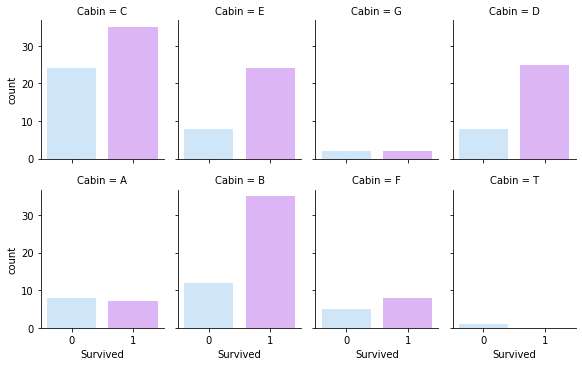

In [207]:
sns.catplot("Survived", col="Cabin", col_wrap=4,data=td[td.Cabin.notnull()],kind="count",height=2.5,aspect=.8)
plt.show()

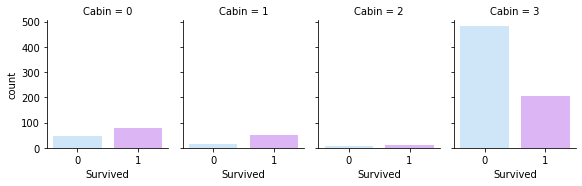

In [208]:
sns.catplot("Survived", col="Cabin", col_wrap=4,data=train_data,kind="count", height=2.5,aspect=.8)
plt.show()

* Cabin 0: ABC
* Cabin 1: DE
* Cabin 2: FG
* Cabin 3: Z(Потерянные данные)

### SibSp vs Survived

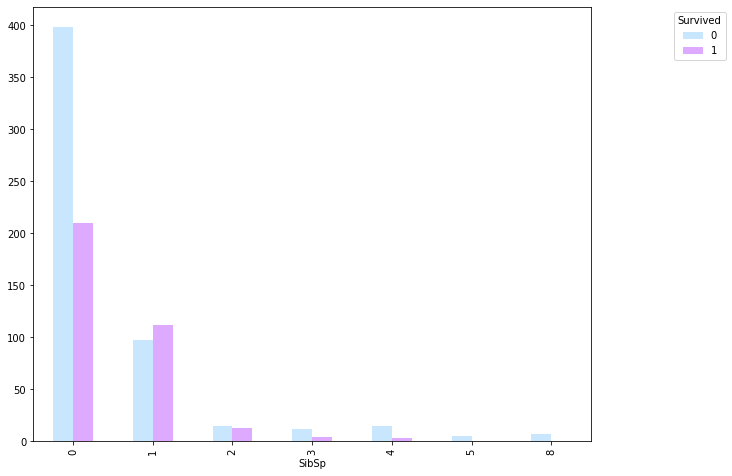

In [209]:
plot_bar(train_data, 'SibSp', 'Survived',False)
plt.legend(title='Survived',loc='upper right',bbox_to_anchor=(1.25, 1))
plt.gcf().set_size_inches(10,8)
plt.show()

### Parch vs Survived

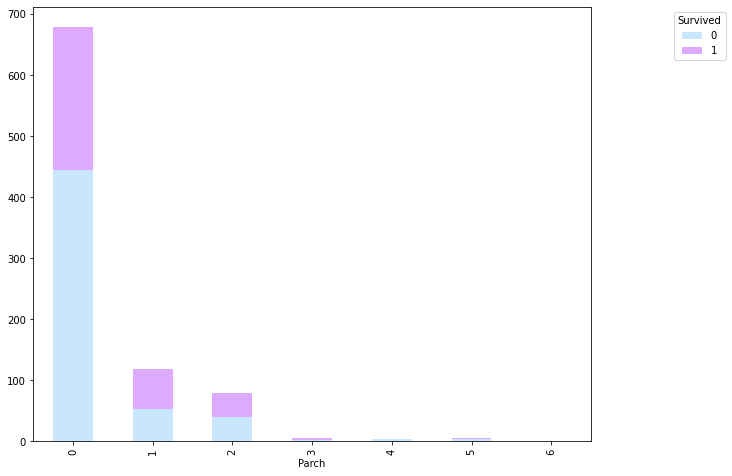

In [210]:
plot_bar(train_data, 'Parch', 'Survived',True)
plt.legend(title='Survived',loc='upper right',bbox_to_anchor=(1.25, 1))
plt.gcf().set_size_inches(10,8)
plt.show()

### Sex vs Survived

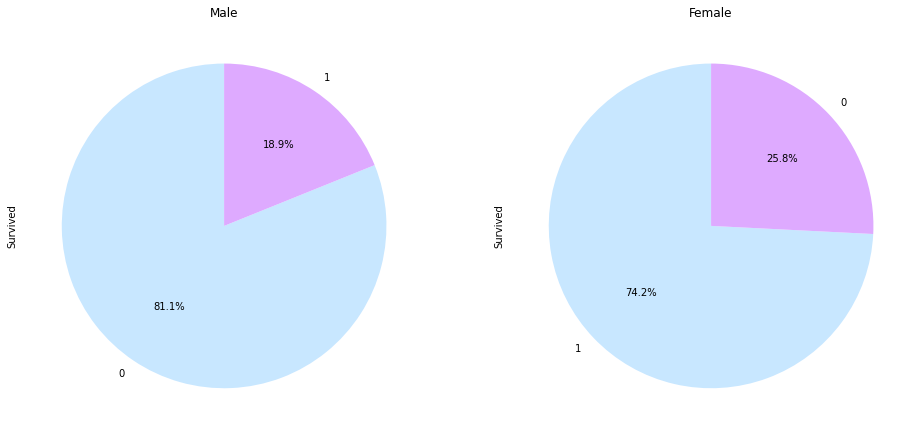

In [211]:
data = train_data[['Sex', 'Survived']]
data1 = data.loc[data.Sex == 0]
data2 = data.loc[data.Sex != 0]

plt.figure(figsize = (16, 8))

ax1 = plt.subplot(121, aspect = 'equal')
data1['Survived'].value_counts().plot.pie(startangle=90,autopct='%1.1f%%', ax=ax1)
ax1.title.set_text('Male')

ax2 = plt.subplot(122, aspect='equal')
data2['Survived'].value_counts().plot.pie(startangle=90,autopct='%1.1f%%', ax=ax2)
ax2.title.set_text('Female')

plt.show()

### Embarked and Fare vs Survived

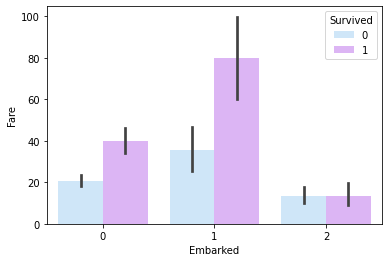

In [212]:
sns.barplot(x = 'Embarked', y = 'Fare', hue = "Survived", data = train_data)
plt.show()

### Fare vs Survived

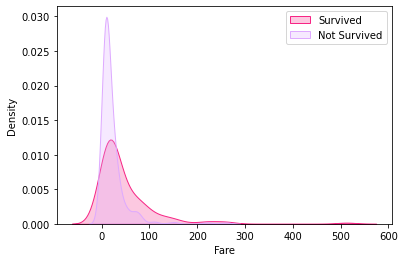

In [213]:
sns.kdeplot(train_data['Fare'][train_data.Survived == 1], color=custom_colors[2], shade=True)
sns.kdeplot(train_data['Fare'][train_data.Survived == 0], color = custom_colors[1], shade = True)

plt.legend(['Survived', 'Not Survived'])
plt.show()

### Age vs Survived

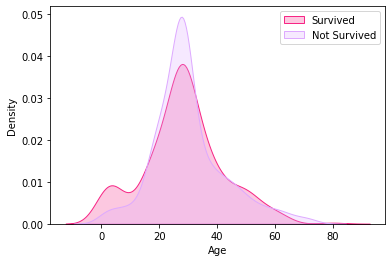

In [214]:
sns.kdeplot(train_data['Age'][train_data.Survived == 1], color=custom_colors[2], shade=True)
sns.kdeplot(train_data['Age'][train_data.Survived == 0], color=custom_colors[1], shade=True)

plt.legend(['Survived', 'Not Survived'])
plt.show()

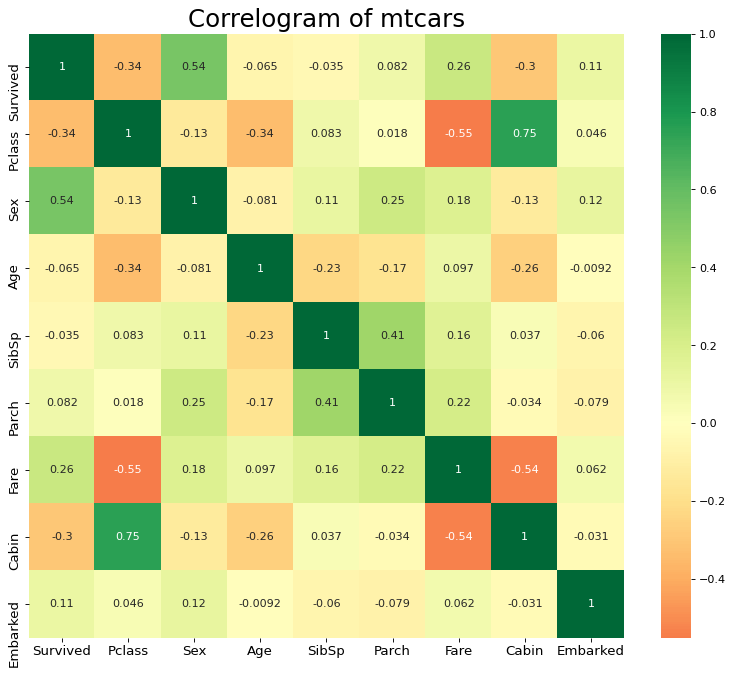

In [215]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(train_data.corr(), xticklabels=train_data.corr().columns, yticklabels=train_data.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [216]:
expected_values = train_data['Survived']
train_data.drop('Survived', axis = 1, inplace = True)

In [217]:
train_data.drop('Cabin', axis = 1, inplace = True)
test_data.drop('Cabin', axis = 1, inplace = True)

## Training and testing

In [218]:
X = train_data.values
y = expected_values.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [219]:
def data_to_StandardScaler(data):
    sc = StandardScaler()
    data = sc.fit_transform(train_data)
    return data

### RandomForestClassifier

In [277]:
model = RandomForestClassifier(criterion='gini',
                                           n_estimators=1750,
                                           max_depth=7,
                                           min_samples_split=6,
                                           min_samples_leaf=6,
                                           max_features='auto',
                                           oob_score=True,
                                           random_state=42,
                                           n_jobs=-1,
                                           verbose=1) 

In [278]:
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    2.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1750 out of 1750 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent worker

In [279]:
print("Training accuracy: ", accuracy_score(y_train, y_pred_train))
print("Testing accuracy: ", accuracy_score(y_test, y_pred_test))


Training accuracy:  0.8778089887640449
Testing accuracy:  0.8435754189944135


In [280]:
print("\nConfusion Matrix\n")
cm = confusion_matrix(y_test, y_pred_test)
print(cm)


Confusion Matrix

[[101   9]
 [ 19  50]]


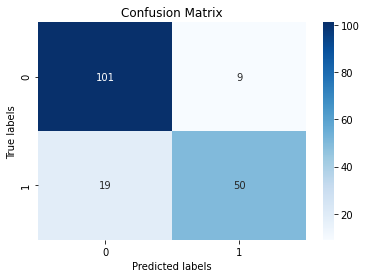

In [281]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g',cmap='Blues') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

plt.show()

In [282]:
fpr, tpr, _ = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)
print("\nROC AUC on evaluation set",roc_auc )


ROC AUC on evaluation set 0.8214097496706194


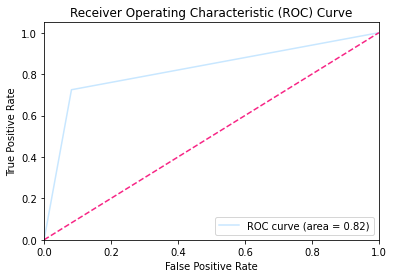

In [283]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc,color=custom_colors[0])
plt.plot([0, 1], [0, 1], 'k--',color=custom_colors[2])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## DecisionTreeClassifier

In [284]:
model_2 = DecisionTreeClassifier( criterion='gini', 
                                 max_depth=7, 
                                 random_state=42, 
                                 min_samples_split = 6, 
                                 min_samples_leaf=6, 
                                 max_features='auto', 
                                 )

In [285]:
model_2.fit(X_train, y_train)
y_pred_train = model_2.predict(X_train)
y_pred_test = model_2.predict(X_test)

In [286]:
print("Training accuracy: ", accuracy_score(y_train, y_pred_train))
print("Testing accuracy: ", accuracy_score(y_test, y_pred_test))


Training accuracy:  0.8398876404494382
Testing accuracy:  0.7988826815642458


In [287]:
print("\nConfusion Matrix\n")
cm = confusion_matrix(y_test, y_pred_test)
print(cm)


Confusion Matrix

[[95 15]
 [21 48]]


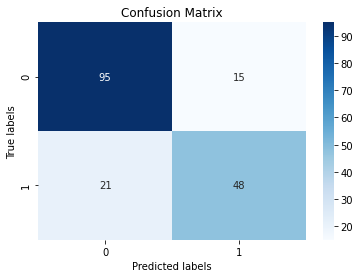

In [288]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g',cmap='Blues') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

plt.show()

In [289]:
fpr, tpr, _ = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)
print("\nROC AUC on evaluation set",roc_auc )


ROC AUC on evaluation set 0.7796442687747035


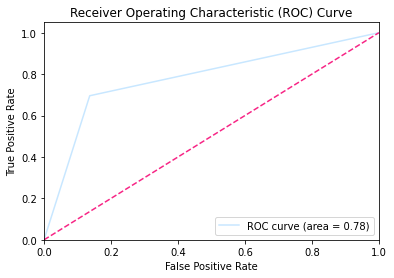

In [290]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc,color=custom_colors[0])
plt.plot([0, 1], [0, 1], 'k--',color=custom_colors[2])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### LogisticRegression

In [291]:
model_3 = LogisticRegression(random_state = 42,
                            n_jobs = -1, 
                            solver='lbfgs')

In [292]:
model_3.fit(X_train, y_train)
y_pred_train = model_3.predict(X_train)
y_pred_test = model_3.predict(X_test)

In [293]:
print("Training accuracy: ", accuracy_score(y_train, y_pred_train))
print("Testing accuracy: ", accuracy_score(y_test, y_pred_test))

Training accuracy:  0.8047752808988764
Testing accuracy:  0.7821229050279329


In [294]:
print("\nConfusion Matrix\n")
cm = confusion_matrix(y_test, y_pred_test)
print(cm)


Confusion Matrix

[[92 18]
 [21 48]]


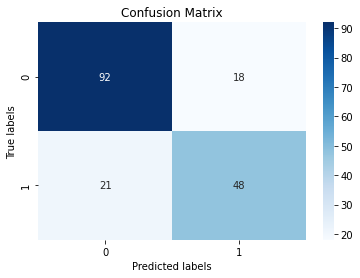

In [295]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g',cmap='Blues') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

plt.show()

In [296]:
fpr, tpr, _ = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)
print("\nROC AUC on evaluation set",roc_auc )


ROC AUC on evaluation set 0.7660079051383399


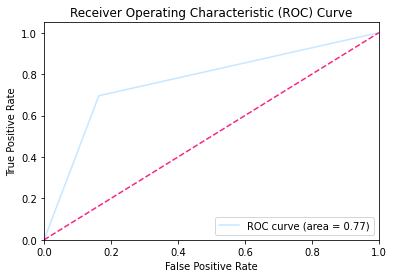

In [297]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc,color=custom_colors[0])
plt.plot([0, 1], [0, 1], 'k--',color=custom_colors[2])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()